In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
df = pd.read_csv(r'C:\Users\ply58\OneDrive\Tài liệu\PythonML\Github Repositories\UNZIP_FOR_NOTEBOOKS_FINAL\DATA\mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
X = df.drop(columns='class', axis=1)
y = df['class']
X = pd.get_dummies(X, drop_first=True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [11]:
param_grid = {
    "n_estimators":[1,5,10,20,40,100],
    'max_depth':[3,4,5,6]
    }
model = GradientBoostingClassifier()
grid = GridSearchCV(model, param_grid)
grid.fit(X_train,y_train)
print(f'Best Parameters: {grid.best_params_}')

Best Parameters: {'max_depth': 3, 'n_estimators': 100}


In [13]:
preds = grid.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [14]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 5.08871292e-16, 0.00000000e+00, 0.00000000e+00,
       4.47634529e-17, 1.04524302e-03, 3.42186072e-17, 5.06011038e-06,
       0.00000000e+00, 0.00000000e+00, 1.63037106e-17, 0.00000000e+00,
       1.85114735e-17, 0.00000000e+00, 0.00000000e+00, 5.71685316e-07,
       2.31053911e-03, 5.16728878e-02, 1.84253604e-04, 2.09326976e-02,
       1.82499853e-02, 4.65768667e-03, 6.14744334e-01, 3.94907433e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.25092906e-02,
       1.10622598e-02, 0.00000000e+00, 1.88187992e-16, 0.00000000e+00,
       1.38948280e-17, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.55513305e-16, 0.00000000e+00, 2.25329302e-17, 0.00000000e+00,
       4.39922283e-04, 1.05061271e-03, 1.35970145e-01, 4.69032068e-03,
       2.23477786e-02, 6.21308869e-04, 6.12113083e-06, 6.53890008e-05,
       1.83319493e-05, 1.70638552e-06, 4.58207417e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.67811493e-06, 0.00000000e+00,
      

In [16]:
feat_import = grid.best_estimator_.feature_importances_
imp_feats = pd.DataFrame(index=X.columns, data=feat_import,columns=['Importance'])
imp_feats

,Importance
cap-shape_c,2.911502e-04
cap-shape_f,5.088713e-16
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,4.476345e-17
...,...
habitat_l,1.353809e-07
habitat_m,7.333394e-17
habitat_p,0.000000e+00
habitat_u,1.004851e-05


In [17]:
imp_feats.sort_values("Importance", ascending=False)

,Importance
odor_n,0.614744
stalk-root_c,0.135970
bruises_t,0.051673
stalk-surface-below-ring_y,0.045821
spore-print-color_r,0.030495
...,...
stalk-color-below-ring_o,0.000000
stalk-color-below-ring_p,0.000000
veil-color_o,0.000000
veil-color_w,0.000000


In [18]:
imp_feats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Importance,95.0,0.010526,0.064679,0.0,0.0,1.353809e-07,0.00051,0.614744


In [19]:
imp_feats = imp_feats[imp_feats['Importance'] > 0.000527]
imp_feats.sort_values('Importance')

,Importance
population_y,0.000550
stalk-surface-above-ring_k,0.000621
cap-surface_g,0.001045
stalk-root_b,0.001051
population_c,0.001174
stalk-color-below-ring_w,0.001429
ring-type_p,0.001448
cap-color_y,0.002311
stalk-color-above-ring_w,0.003104
stalk-color-below-ring_y,0.003134


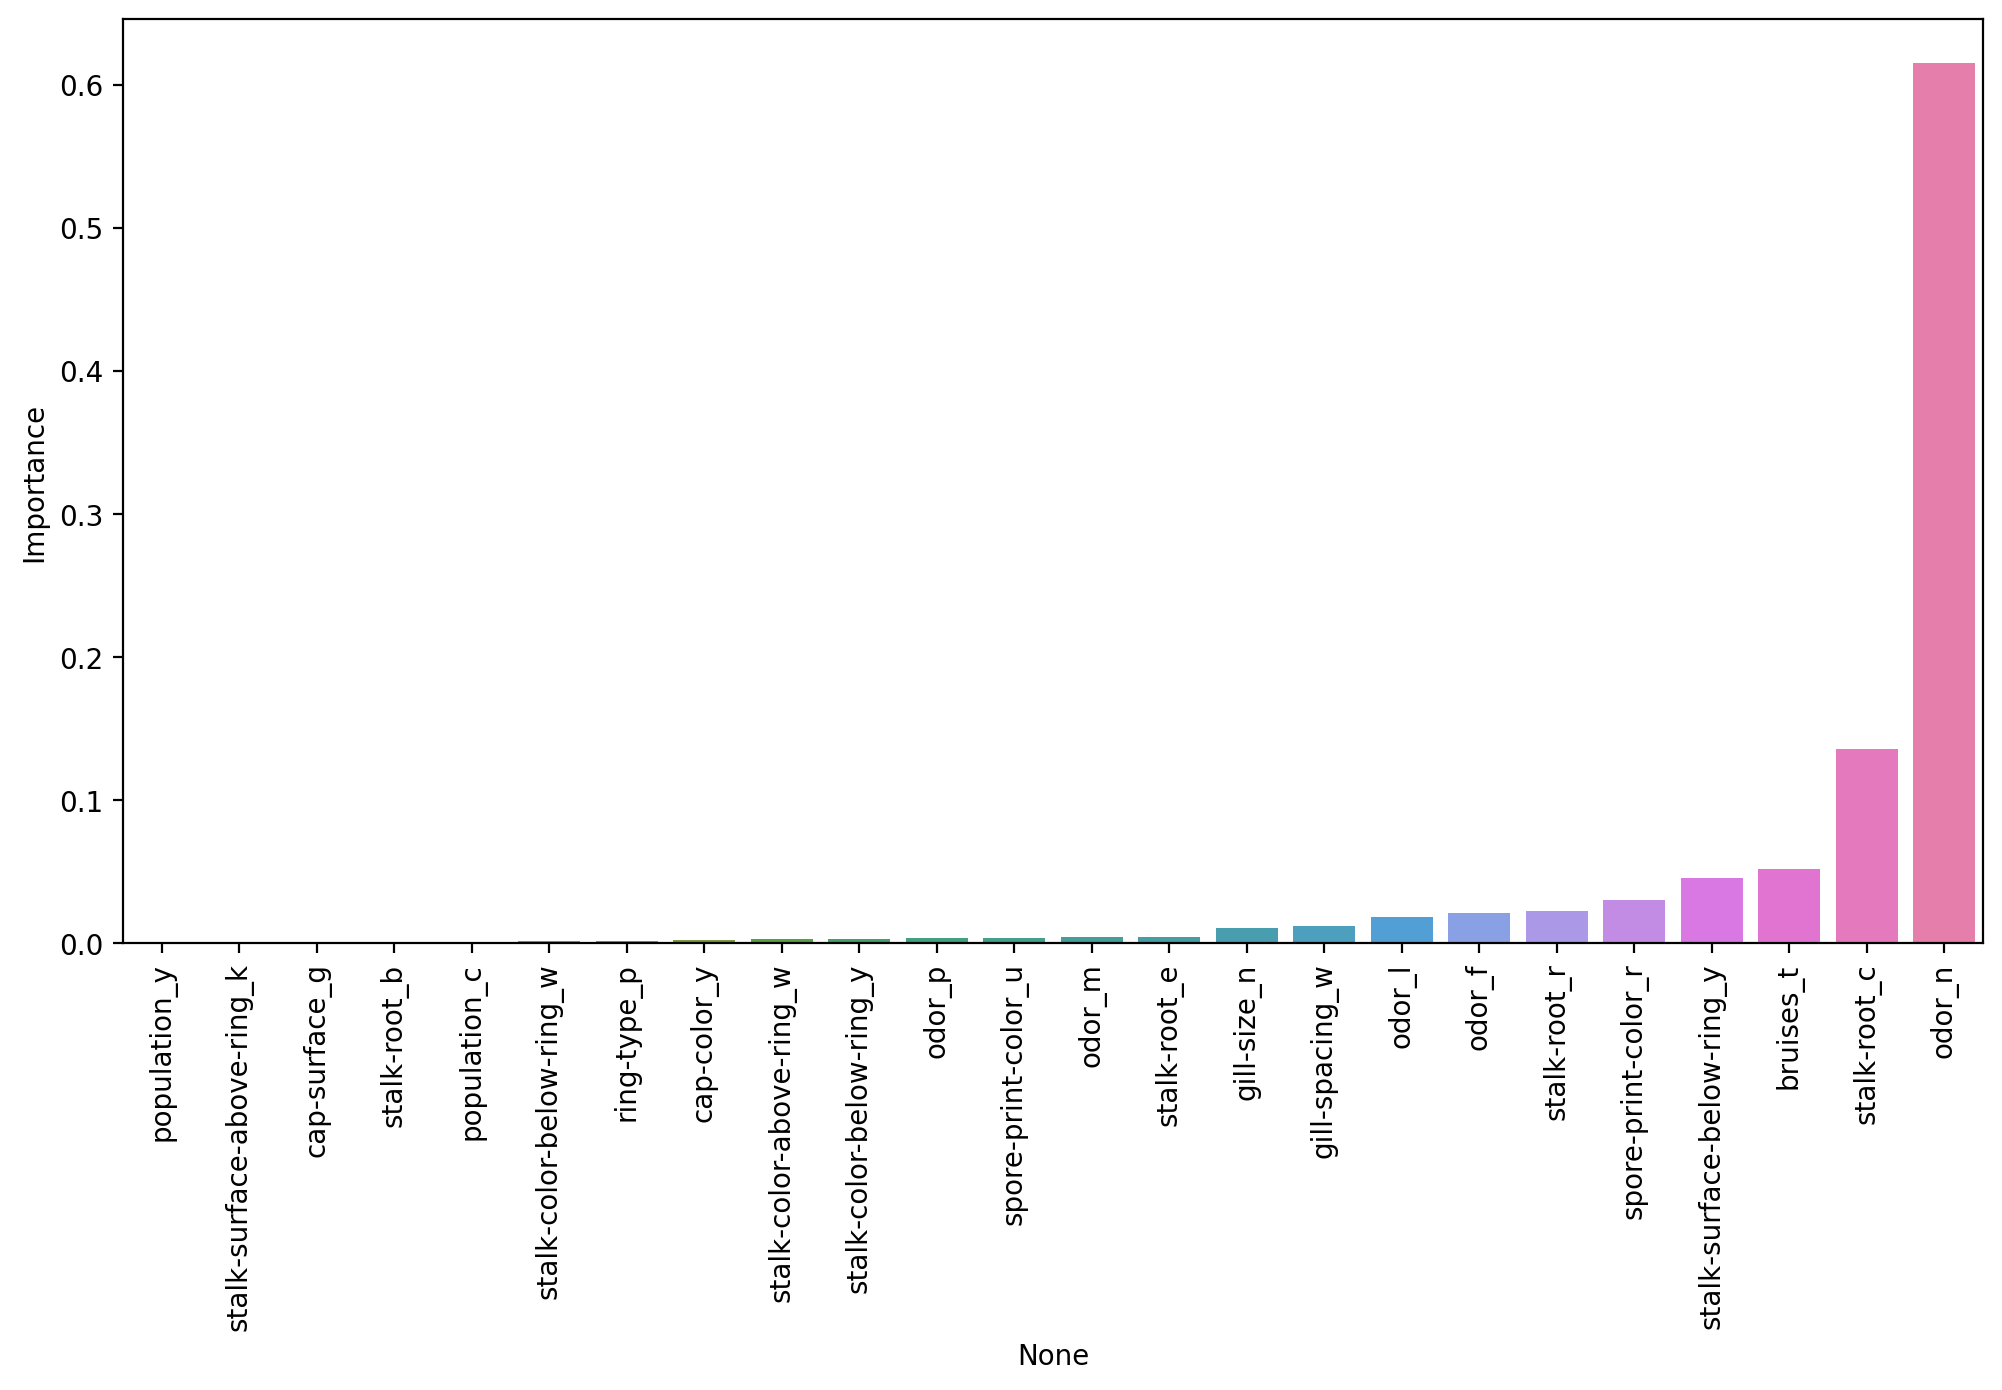

In [23]:
plt.figure(figsize=(12, 6), dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'), x=imp_feats.sort_values('Importance').index, y='Importance', hue=imp_feats.sort_values('Importance').index)
plt.xticks(rotation=90);